In [2]:
import pandas as pd
import lightkurve as lk
import numpy as npxa
import matplotlib.pyplot as plt
import juliandate as jd
from astropy.time import Time

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/lightkurve/prf/__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(


In [3]:
i2 = pd.read_csv('/Users/shaunparasher/Documents/VS Code/denison_2026_test/shaun/Data/ASASSN/asassn_diff_image_added_lightcurve.csv')
i1 = pd.read_csv('/Users/shaunparasher/Documents/VS Code/denison_2026_test/shaun/Data/ASASSN/asassn_diff_image_lightcurve.csv')
i3 = pd.read_csv('/Users/shaunparasher/Documents/VS Code/denison_2026_test/shaun/Data/ASASSN/asassn_image_lightcurve.csv')

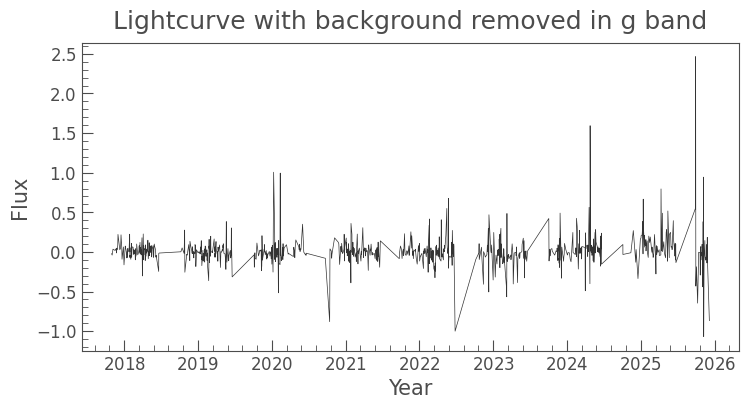

In [4]:
i1_V = i1[i1['Filter'] == 'V']
i1_g = i1[i1['Filter'] == 'g']
i2_V = i2[i2['Filter'] == 'V']
i2_g = i2[i2['Filter'] == 'g']

subset = i1_g
band = 'g'

t_years = Time(subset['HJD'], format='jd').decimalyear

curve = lk.LightCurve(time=t_years, flux=subset['flux(mJy)'], flux_err=subset['flux_err'])

ax = curve.plot(title=f"Lightcurve with background removed in {band} band")
ax.set_xlabel("Year")
#plt.errorbar(x = t_years, y = subset['flux(mJy)'] ,  yerr=subset['flux_err'], fmt='o', capsize=5)


plt.show()

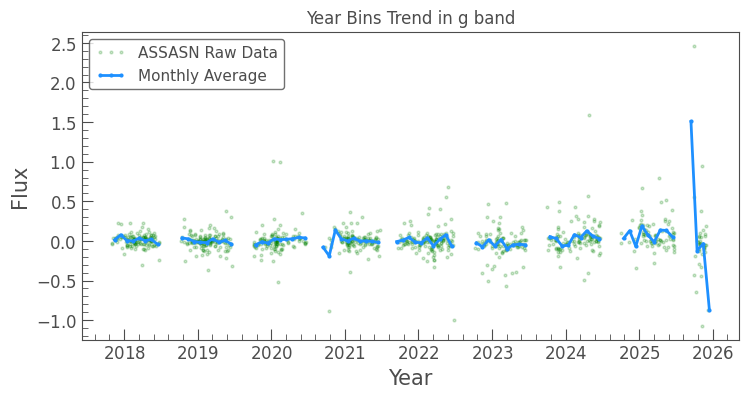

In [5]:
ax = curve.plot(alpha=0.2, color='green', label='ASSASN Raw Data', linestyle='none', marker='o')
bin_curve = curve.bin(time_bin_size=1/12) 

bin_curve.plot(ax=ax, color='dodgerblue', linewidth=2, marker='o', label='Monthly Average')

ax.set_title(f"Year Bins Trend in {band} band")
ax.set_xlabel("Year")
plt.show()

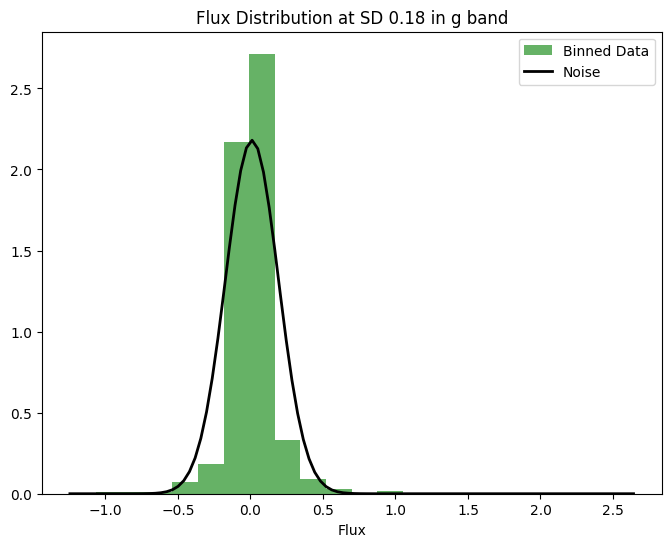

In [6]:
import numpy as np
from scipy.stats import norm

flux_data = subset['flux(mJy)']

plt.figure(figsize=(8, 6))
mu, std = norm.fit(flux_data)
plt.hist(flux_data, bins=20, density=True, alpha=0.6, color='g', label="Binned Data")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label="Noise")

plt.title(f"Flux Distribution at SD {std:.2f} in {band} band")
plt.xlabel("Flux")
plt.legend()
plt.show()

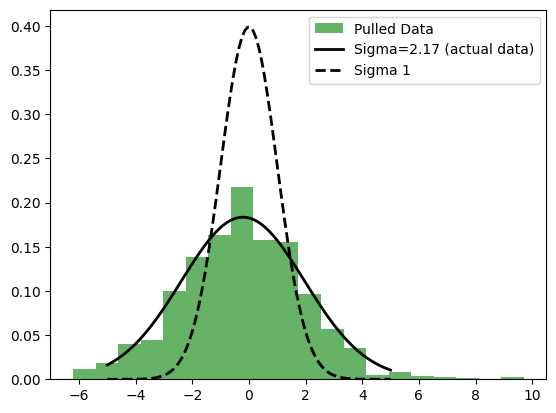

In [7]:
#pull distribution (converts from the gaussian of flux to the gaussian of the flux z scores)

model_mean = np.mean(subset['flux(mJy)'])

pull = ((subset['flux(mJy)'] - model_mean) / subset['flux_err'])

plt.hist(pull, bins=20, density=True, alpha=0.6, color='g', label="Pulled Data")

mu, std = norm.fit(pull)

x = np.linspace(-5, 5, 100)
p_ideal = norm.pdf(x, 0, 1)
p_fit = norm.pdf(x, mu, std)

plt.plot(x, p_fit, 'k-', linewidth=2, label=f"Sigma={std:.2f} (actual data)")
plt.plot(x, p_ideal, 'k--', linewidth=2, label="Sigma 1")
plt.legend()
plt.show()

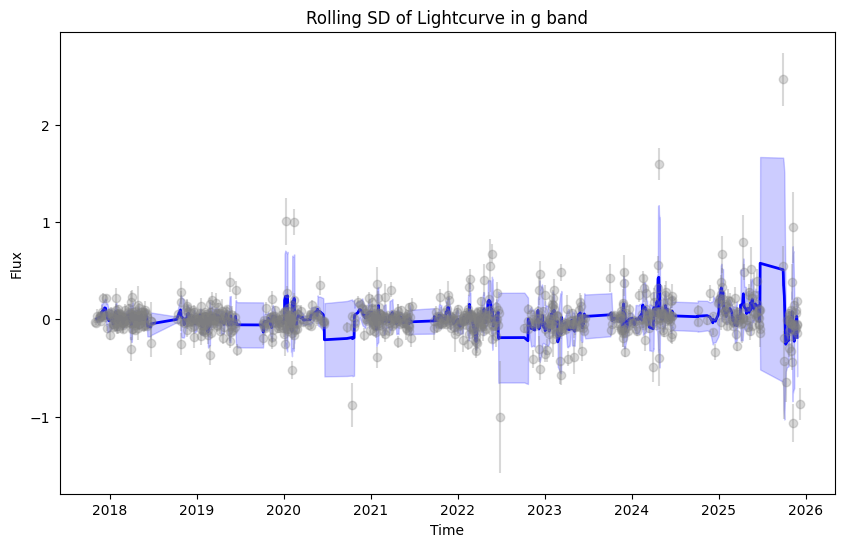

In [8]:
df = curve.to_pandas()
size = 5
rmean = df['flux'].rolling(window=size, center=True).mean()
rstd = df['flux'].rolling(window=size, center=True).std()
plt.figure(figsize=(10, 6))
plt.errorbar(df.index, df['flux'], yerr=df['flux_err'], fmt='o', color='gray', alpha=0.3, label='Data')
plt.plot(df.index, rmean, color='blue', linewidth=2, label=f'Rolling Mean (n={size})')
plt.ylabel('Flux')
plt.xlabel('Time')
plt.title(f'Rolling SD of Lightcurve in {band} band')

plt.fill_between(
    df.index, 
    rmean - rstd, 
    rmean + rstd, 
    color='blue', 
    alpha=0.2, 
    label='Rolling SD'
)
plt.show()